In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("data/stud.csv")

In [5]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
df.isnull().sum()   

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [8]:
df["gender"].value_counts()

gender
female    518
male      482
Name: count, dtype: int64

In [10]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [16]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [18]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [21]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [24]:
print("Categories in 'gender' variable:    ",end=" " )
print(df['gender'].unique())
print("Categories in 'race/ethnicity' variable:    ",end=" " )
print(df['race_ethnicity'].unique())
print("Categories in 'parental_level_of_education' variable:    ",end=" " )
print(df['parental_level_of_education'].unique())
print("Categories in 'lunch' variable:    ",end=" " )
print(df['lunch'].unique())
print("Categories in 'test preparation course' variable:    ",end=" " )
print(df['test_preparation_course'].unique())


Categories in 'gender' variable:     ['female' 'male']
Categories in 'race/ethnicity' variable:     ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' variable:     ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:     ['standard' 'free/reduced']
Categories in 'test preparation course' variable:     ['none' 'completed']


In [27]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != "O"]
categorical_features = [feature for feature in df.columns if df[feature].dtypes == "O"]

print("we have {} numerical features and {} categorical features in the dataset".format(len(numerical_features), len(categorical_features)))
print("we have {} Numerical Features:{}".format(len(numerical_features), numerical_features))
print("We have {} Categorical Features:{}".format(len(categorical_features), categorical_features))


we have 3 numerical features and 5 categorical features in the dataset
we have 3 Numerical Features:['math_score', 'reading_score', 'writing_score']
We have 5 Categorical Features:['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [28]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [31]:
df["total_score"] = df["math_score"] + df["reading_score"] + df["writing_score"]
df['average'] = df['total_score'] / 3
df.head(
    
)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333,76.333333


In [36]:
reading_full=df[df['reading_score']==100]['average'].count()
writing_full=df[df['writing_score']==100]['average'].count()
math_full=df[df['math_score']==100]['average'].count()

print(f"no of students with full score in reading:{reading_full}")
print(f"no of students with full score in writing:{writing_full}")
print(f"no of students with full score in math:{math_full}")



no of students with full score in reading:17
no of students with full score in writing:14
no of students with full score in math:7


In [37]:
reading_less_20=df[df['reading_score']<=20]['average'].count()
writing_less_20=df[df['writing_score']<=20]['average'].count()
math_less_20=df[df['math_score']<=20]['average'].count()
print("Number of students with reading score less than 20:",reading_less_20)
print("Number of students with writing score less than 20:",writing_less_20)
print("Number of students with math score less than 20:",math_less_20)

Number of students with reading score less than 20: 1
Number of students with writing score less than 20: 3
Number of students with math score less than 20: 4


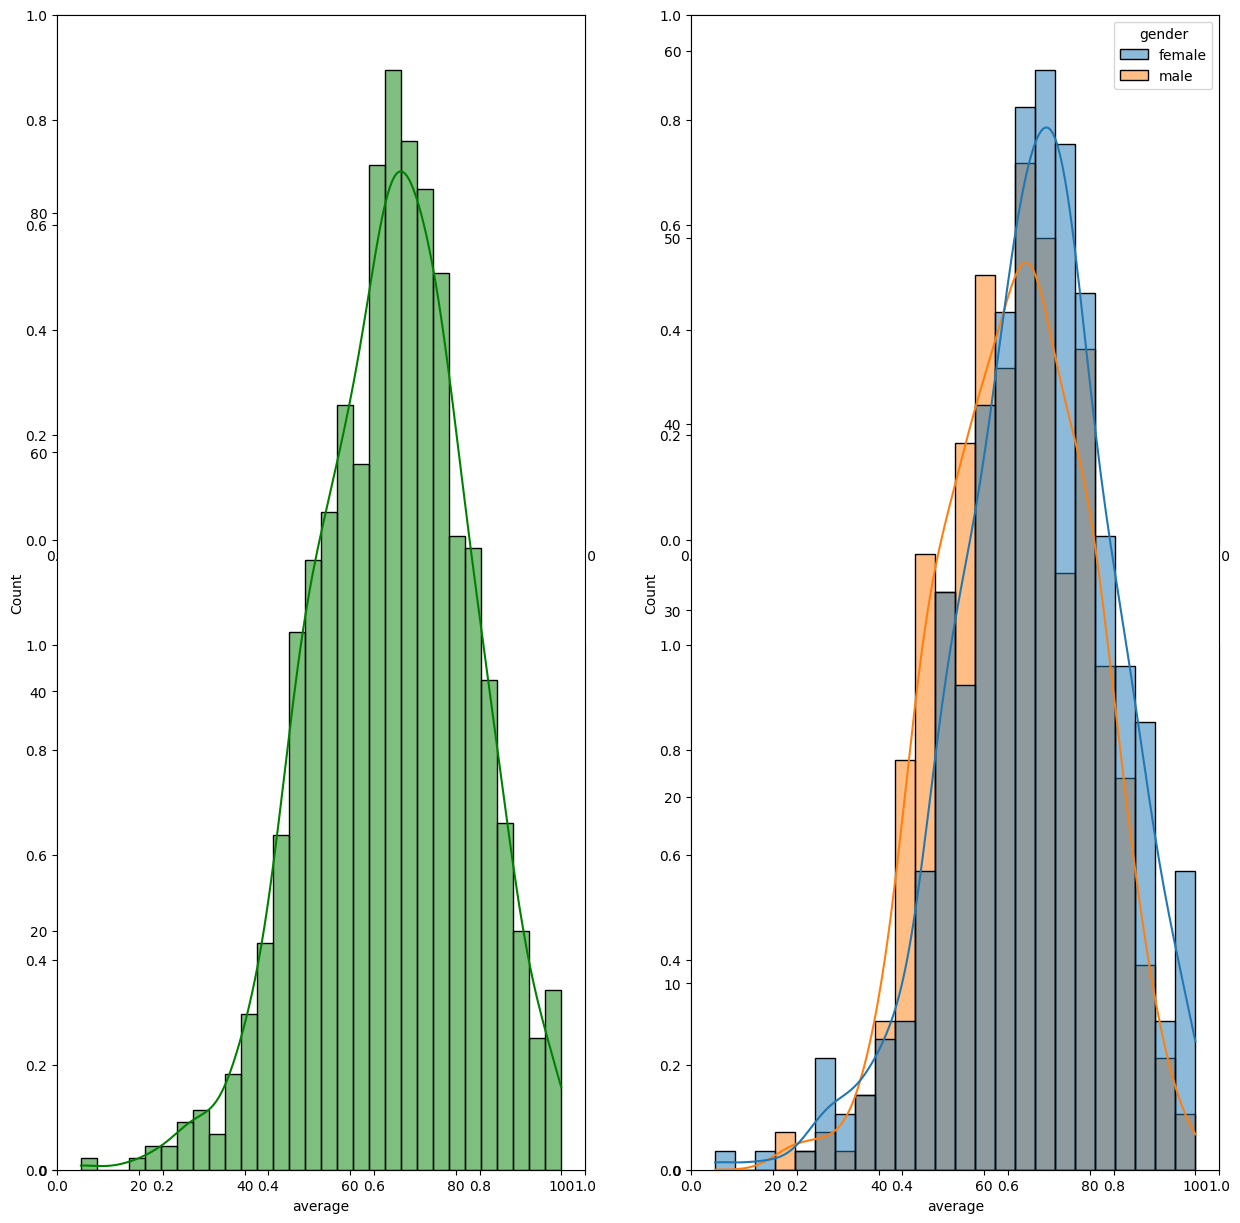

In [39]:
fig,axs=plt.subplots(2,2,figsize=(15,15))
plt.subplot(121)
sns.histplot(data=df,x='average',kde=True,bins=30,color='green')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

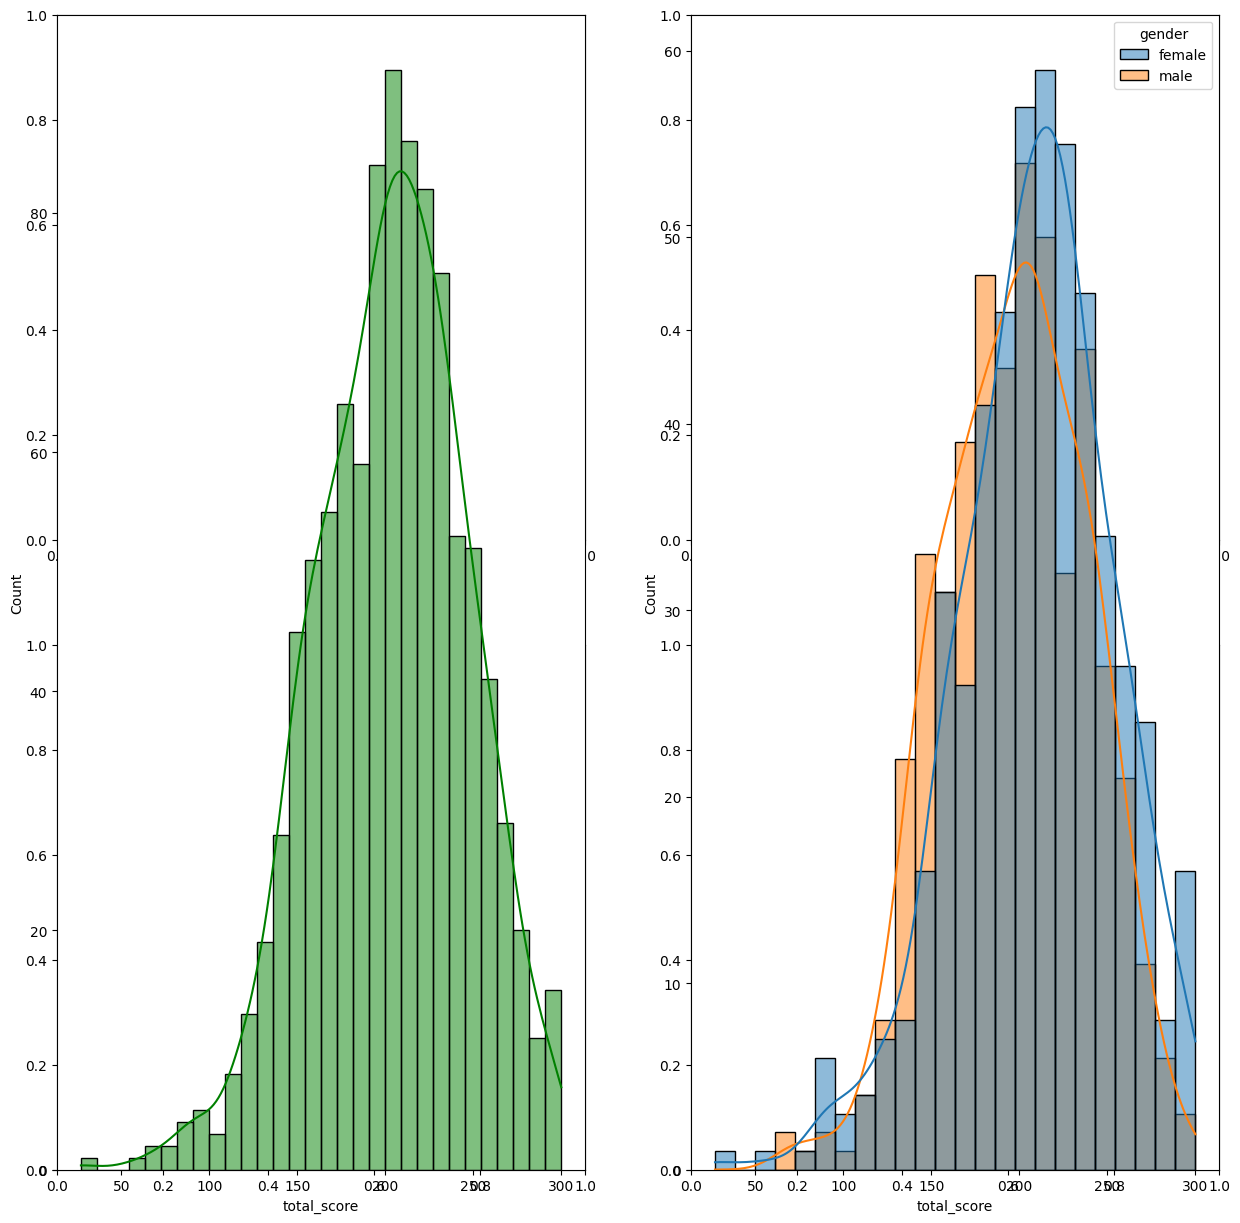

In [41]:

fig,axs=plt.subplots(2,2,figsize=(15,15))
plt.subplot(121)
sns.histplot(data=df,x='total_score',kde=True,bins=30,color='green')
plt.subplot(122)
sns.histplot(data=df,x='total_score',kde=True,hue='gender')
plt.show()